In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/diet.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


In [2]:
#Finding the size of data
df.shape[0]

78

In [3]:
#Finding the columns of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preweight,78.0,72.525641,8.723344,58.0,66.00,72.00,78.000,103.0
weight6weeks,78.0,68.680769,8.924504,53.0,61.85,68.95,73.825,103.0


In [7]:
#checking if there are null values

df.isnull().sum().sum()

0

There are no duplicates in the data

In [9]:
#check if there are duplicate values

df.duplicated().sum()

0

There are no null values in the dataset.

In [12]:
#Lokking at the various types of diet

df['diet'].unique()

array(['B', 'A', 'C'], dtype=object)

# Explorartory data analysis

In [28]:
def hist_bar_plot(data,feature,kde=False,nbins=50):

  fig,(ax1,ax2)=plt.subplots(figsize=(15,10),
                             nrows=2,
                             sharex=True,
                             gridspec_kw={'height_ratios':(0.25,0.75)}
                             )
  if(nbins):
   sns.histplot(data=data,
               x=feature,
               kde=kde,
               ax=ax2,
               bins=nbins)
  else:
   sns.histplot(data=data,
                x=feature,
                ax=ax2,
                kde=kde)
   ax2.axvline(df.feature.mean(),
               color='red',
               linestyle='--',
               label='mean')
   ax2.axvline(df.feature.median(),
               color='green',
               linestyle='-',
               label='median')
   ax2.legend()

#plotting a boxplot
  sns.boxplot(data=df,
              x=feature,
              ax=ax1,
            )

  plt.show()



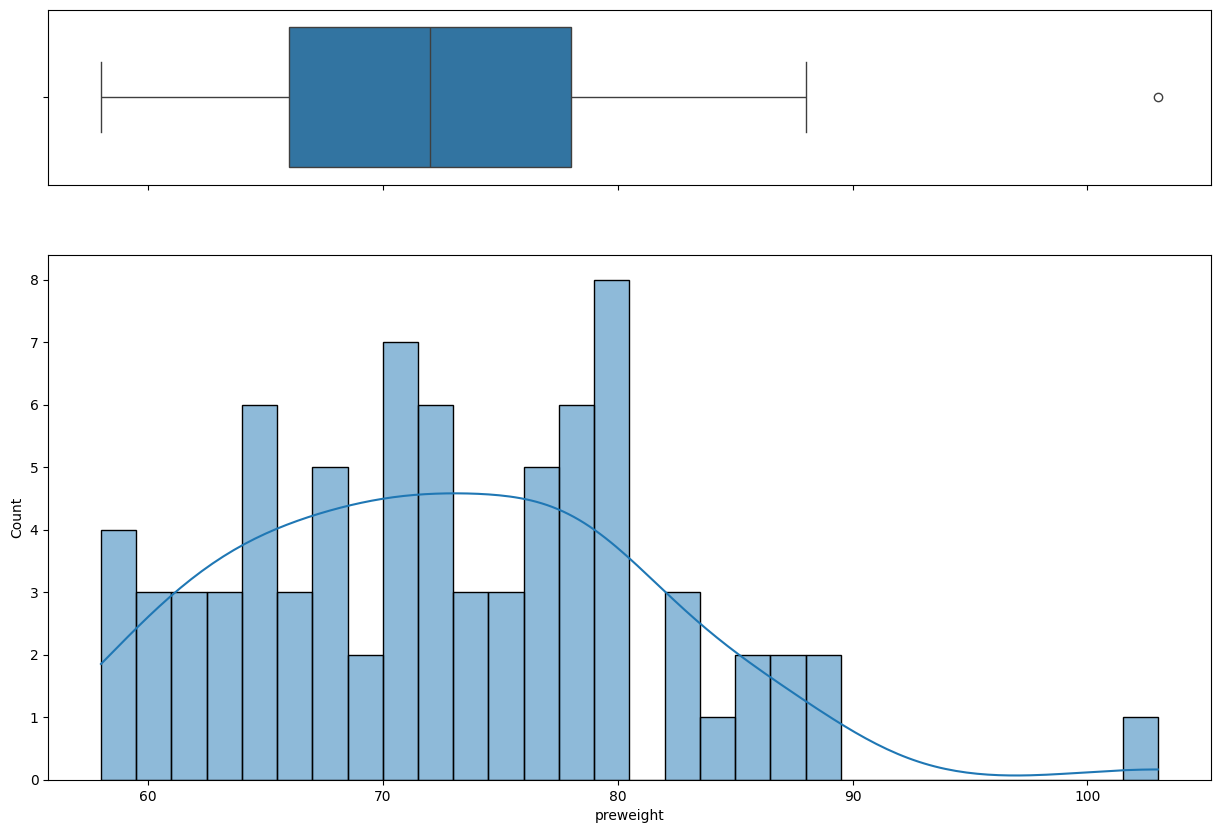

In [32]:
#Histogram and boxplot for preweight and weight6weeks
hist_bar_plot(data=df,feature='preweight',kde=True,nbins=30)

We infer that preweight is skewed to right.
Mean and median weight lies around 70 kg for pre-weight


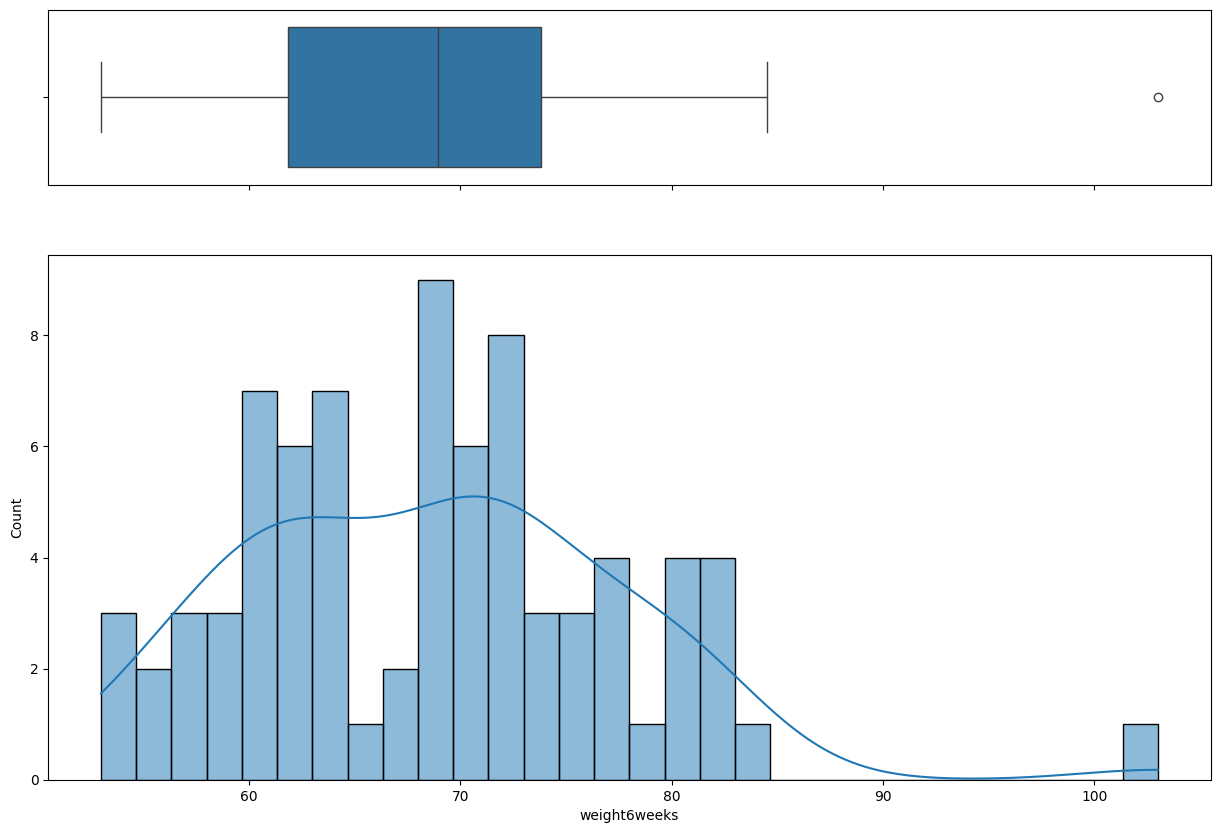

In [37]:
#Histogram and boxplot for weight6weeks
hist_bar_plot(data=df,feature='weight6weeks',kde=True,nbins=30)

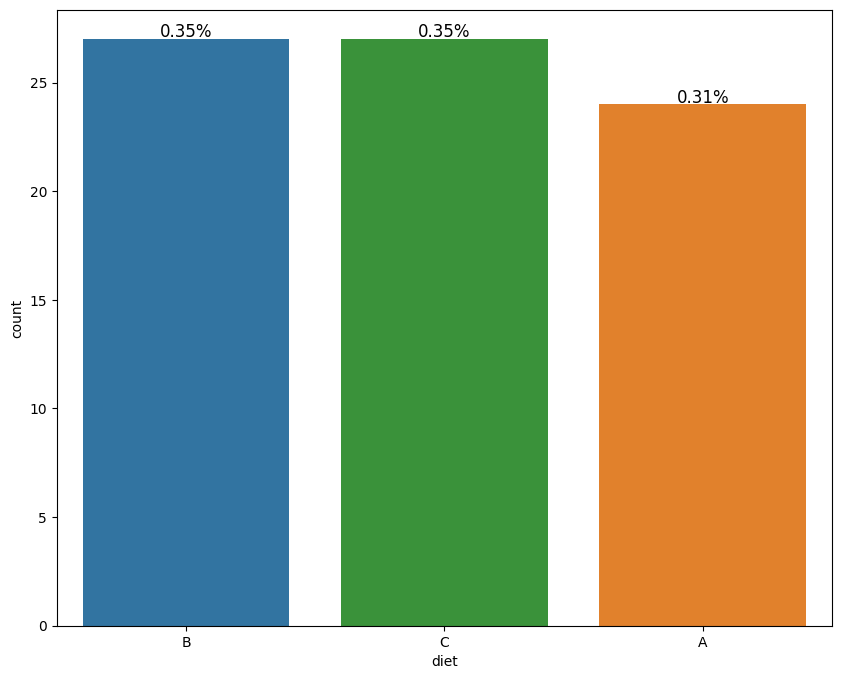

In [49]:
f,ax = plt.subplots(figsize=(10,8))

sns.countplot(data=df,
              x='diet',
              order=df['diet'].value_counts().index,
              hue='diet',
              ax=ax)

total_len = len(df)

for p in ax.patches:
  height = p.get_height()

  label = '{:1.2f}%'.format(height/total_len)
  x = p.get_x()+(p.get_width()/2)
  y = height

  ax.annotate(
              label,
              (x,y),
              ha='center',
              va='center',
              fontsize=12,
              xytext=(0,5),
              textcoords='offset points'
            )

Multi-Variate Analysis

<Axes: >

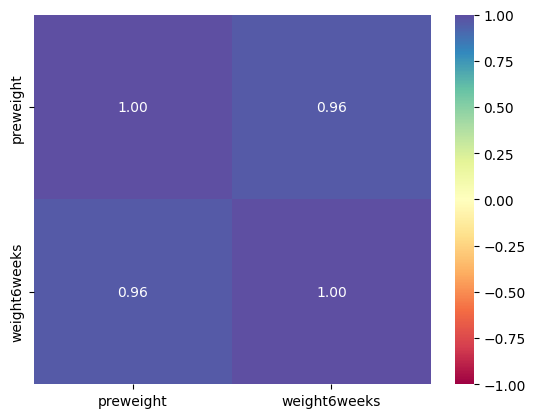

In [55]:
#let us plot a heatmap

var_list = df.select_dtypes(include=np.number).columns.to_list()
sns.heatmap(df[var_list].corr(),
          annot=True,
          cmap='Spectral',
          fmt='.2f',
          vmin=-1,
          vmax=1,
          cbar=True)

The multivariate analysis show that pre-weight and weight-after 6 weeks are higly postively corelated.

In [51]:
var_list

['preweight', 'weight6weeks']

# Feature Engineering

<Axes: xlabel='diet', ylabel='weight_loss'>

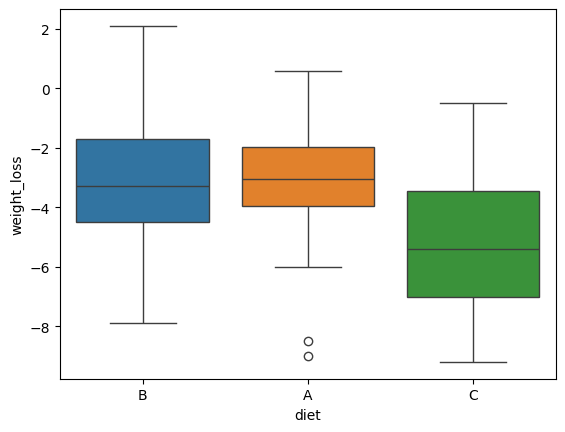

In [5]:
#Let us see weightloss for each type of diet

df['weight_loss'] = df['weight6weeks'] - df['preweight']
df.head()

sns.boxplot(
    data=df,
    x='diet',
    y='weight_loss',
    hue='diet',
)

The distribution of weight loss is different among different groups.
It is observed that group C diet impact more on weight loss.
We infer that media  weight loss of group A and Group B are almost same but the median weight loss of group C is different.

Let us check statistically if the weight loss is same across all groups.

# Statistically prove if mean weight loss is same across all diets

## Step 1: Define Null and Alterante Hypothesis

Null Hypothsis: Mean weight loss is equal across all diets.

Alternate Hypothesis: Atleast one diet program's mean value of weight loss is different from the rest diets.

## Step 2: Select Appropriate Test

We are testing equality of means of 3 different diets.
Hence we choose f_oneway test.

The samples are simple random samples.
Let us use Shapiro wilks test and Levenes test for testing equality of means
and equality of varaiance.



### Shapiro wilks test

Null Hypothesis: Data follows normal distribution

Alternate Hypothesis: Data does not follow normal distribution

In [6]:
from scipy.stats import shapiro

test_static,p_value = shapiro(df['weight_loss'])

if p_value < 0.05:
  print('Data does not follow normal distribution')
else:
  print('Data follows normal distribution')

print(test_static,p_value)

Data follows normal distribution
0.989908178957397 0.8019883459468051


###Levene's test

Null Hypothesis: variance of weight loss is same across each diet

Alternate Hypothesis: variance of weight loss of atleast one ot the three diets is different

In [16]:
from scipy.stats import levene

#performing levene's test
test_static,p_value = levene(df[df['diet']=='A']['weight_loss'],
                             df[df['diet']=='B']['weight_loss'],
                             df[df['diet']=='C']['weight_loss'])
print(test_static,p_value)

0.6256665777896312 0.5376731304274011


In [24]:
if p_value<= 0.05:
  print('Variance of weight loss of atleast one diet is different')
else:
  print('Variance of weight loss is same across diets')

Variance of weight loss is same across diets


Since the P value is greater than 5% Null hypothesis is not rejected.
THus the variance of weight_loss of all three diet methods are same.

##Step 3: Choosing the significance Level

In [ ]:
alpha = 0.05
#we will do hypothesis testing at 5% significance level

##Step 4: Prepare/Collect data

In [25]:
diet_a = df[df['diet']=='A']['weight_loss']
diet_b = df[df['diet']=='B']['weight_loss']
diet_c = df[df['diet']=='C']['weight_loss']

##Step 5: Perform the test

In [26]:
from scipy.stats import f_oneway

test_static,p_value = f_oneway(diet_a,diet_b,diet_c)
print(test_static,p_value)

6.197447453165349 0.0032290142385893524


##Step 6: Compare p-value with alpha

In [28]:
if(p_value<=0.05):
  print('Reject the Null Hypothesis - Mean value of diet is same across all diets')
else:
  print('Do not Reject Null Hypothesis - Mean value of diet is not same across all diets')

Reject the Null Hypothesis - Mean value of diet is same across all diets


##Step 7: Draw Inference

Thus we have enough statistical evidence to say that mean value across all diets is not the same. At least one mean value among the 3 diets differ.

#Conclusion

We observe that all 3 diets aid in weight loss

Of all 3 diets Diet 'C' seem to have high impact

After hypothesis testing we conclude that atleast one diet is different from all other diets

More investigation can be done of diet 'C'